# Classification Between Males And Females
<b>  In this dataset, I have chosen to deal with the gender classification of human beings based on facial structure such as nose width, Forehead length, etc.

In [241]:
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 
from numpy import cov

In [242]:
person=pd.read_csv('/Users/ortal/Desktop/OneDrive - Ariel University/שיעורים/AI/proiect/dataset/gender_classification_v7.csv')
person


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


## Explanation Of Features

<b>long hair:</b> Boolean features. If the hair is short=0, if it's long=1.\
<b>forehead_width_cm:</b> The width of the forehead in cm.\
<b>forehead_height_cm:</b> The hught of the forehead in cm.\
<b>nose_wide:</b> Boolean features. If the nose is wide=1, if it's thin=0.\
<b>nose_long:</b> Boolean features. If the nose is short=0, if it's long=1.\
<b>lips_thin:</b> Boolean features. If the lips are thin =1, if they width=0.\
<b>distance_nose_to_lip_long:</b> boolean features. If the distance between the nose and the lip is short=0, if it's long=1.\
<b>gender:</b> Male or female

<B>Please note </b>- I did not find according to what the ratio is defined as long and short, and therefore please assume that it was defined after a general average calculation of the relevant parameters in the population. 

    
    

## Information

In [243]:
person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


<b> There is 5000 raws and 8 columns. 
There is no null values in this dataFrame<b>
    


## Gender
Gender is the target that I want to predict. Let's see the relationship between gender and other parameters

* Note that "gender" is categorical feature, so we  change it to numerical (after we show the data):


In [244]:
person.gender.value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

<B>We can see that there is 2501 sumples of males and 2500 sumples of females.



### The Average Parameters Of Each Gender:

In [245]:
gender1=person.groupby(['gender']).mean()
gender1

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
gender,,,,,,,
Female,0.873251,12.811675,5.796321,0.114754,0.135946,0.121551,0.121551
Male,0.866000,13.551440,6.096360,0.873200,0.880000,0.864800,0.876400


<Figure size 1440x1440 with 0 Axes>

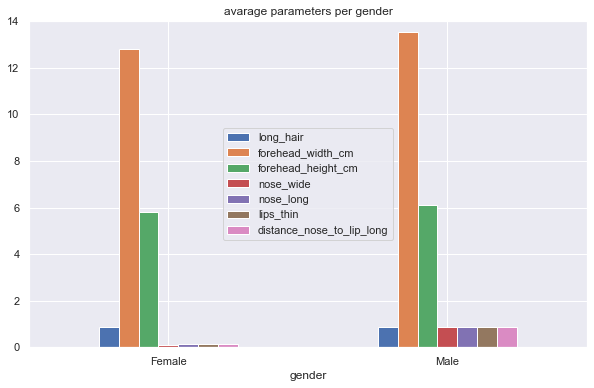

In [246]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(20,20))
gender2=gender1.plot(kind='bar',figsize=(10,6))

for item in gender2.get_xticklabels():
    item.set_rotation(0)
    
plt.ylim(0.0, 14.0)
plt.legend(loc='center')
plt.title('avarage parameters per gender')
plt.show()

<B>We can see that the average of all the parameters (accept of hair) in males is higher than the females. lets see it more closely:

### Lip Thickness By Gender

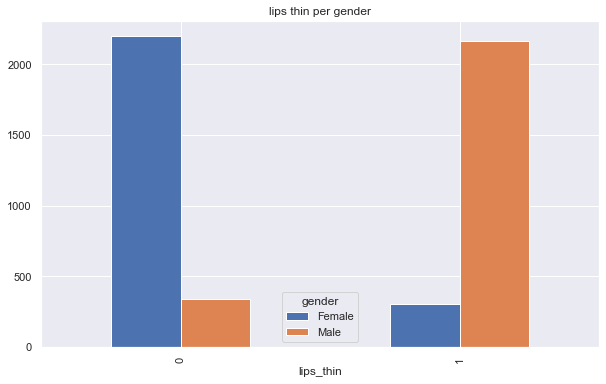

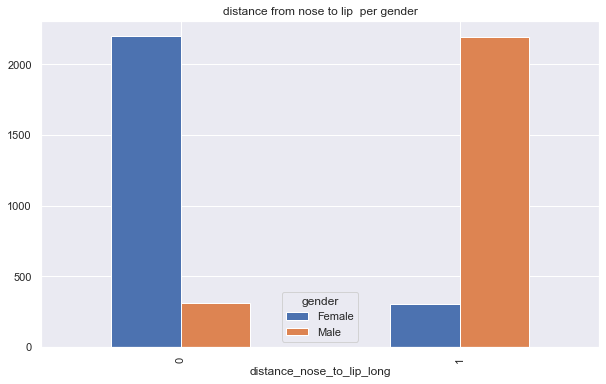

lips_thin  gender
0          Female    2197
           Male       338
1          Female     304
           Male      2162
dtype: int64

In [247]:
person.groupby(['lips_thin','gender']).size().unstack().plot(kind='bar',figsize=(10,6))
plt.title('lips thin per gender')
person.groupby(['distance_nose_to_lip_long','gender']).size().unstack().plot(kind='bar',figsize=(10,6))
plt.title('distance from nose to lip  per gender')
plt.show()
# print the size:
person.groupby(['lips_thin','gender']).size()


In [248]:
person.groupby(['distance_nose_to_lip_long','gender']).size()

distance_nose_to_lip_long  gender
0                          Female    2197
                           Male       309
1                          Female     304
                           Male      2191
dtype: int64

* <b>We can see that  most female have wider lips and shorter distance between the nose and lips than the males.

###  Foreheade Wide And Height By Gender:

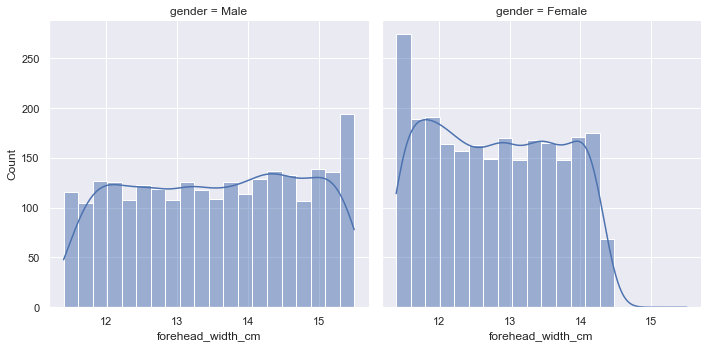

In [249]:
sns.displot(data=person, x="forehead_width_cm", col="gender",kde=True, color='b')

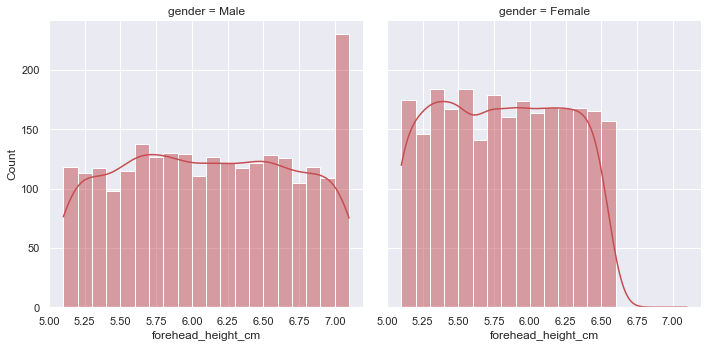

In [250]:
sns.displot(data=person, x="forehead_height_cm", col="gender",kde=True, color='r' )


* <B>we can see that males has more wide and high forehead than females.

### Hair Length By Gender :

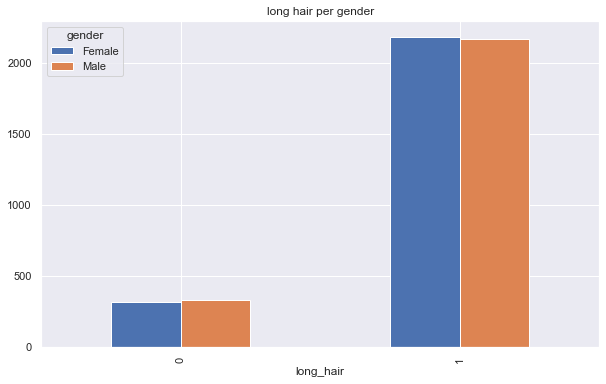

long_hair  gender
0          Female     317
           Male       335
1          Female    2184
           Male      2165
dtype: int64

In [251]:
person.groupby(['long_hair','gender']).size().unstack().plot(kind='bar',figsize=(10,6))

plt.title('long hair per gender')
plt.show()
person.groupby(['long_hair','gender']).size()

* <B> We can see that there is very small diferences in hair length between males and females

## Length And Width Nose By Gender

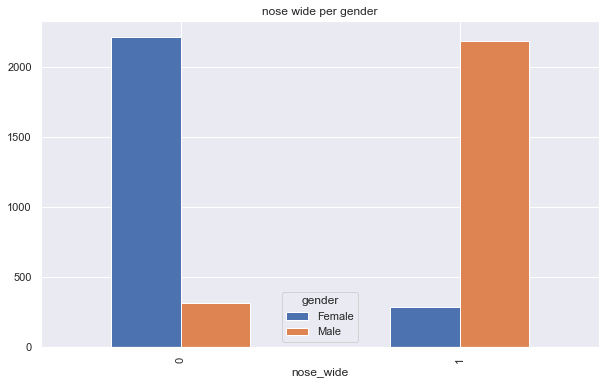

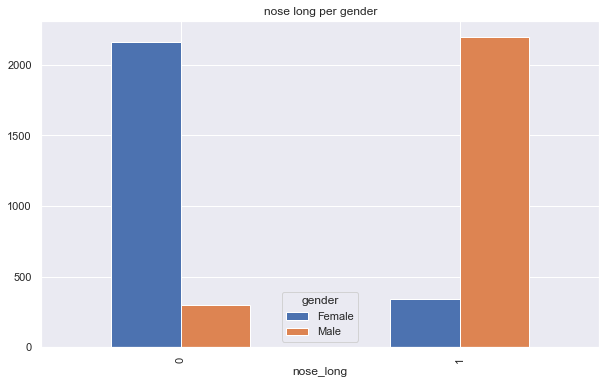

nose_wide  gender
0          Female    2214
           Male       317
1          Female     287
           Male      2183
dtype: int64

In [252]:
person.groupby(['nose_wide','gender']).size().unstack().plot(kind='bar',figsize=(10,6))
plt.title('nose wide per gender')
person.groupby(['nose_long','gender']).size().unstack().plot(kind='bar',figsize=(10,6))
plt.title('nose long per gender')
plt.show()
##printing the size
person.groupby(['nose_wide','gender']).size()

In [253]:
person.groupby(['nose_long','gender']).size()

nose_long  gender
0          Female    2161
           Male       300
1          Female     340
           Male      2200
dtype: int64

* <B> We can see that females have thiner and shorter noses than males.

## Preparing The Data:
#### Changing Gender To Numeric
males=0 females=1:

In [254]:
 person['gender_code']=pd.factorize(person.gender)[0]
person.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_code
0,1,11.8,6.1,1,0,1,1,Male,0
1,0,14.0,5.4,0,0,1,0,Female,1
2,0,11.8,6.3,1,1,1,1,Male,0
3,0,14.4,6.1,0,1,1,1,Male,0
4,1,13.5,5.9,0,0,0,0,Female,1


#### Erase The Original Column Of Gender

In [255]:
person.drop(['gender'],axis=1 ,inplace = True)

## Correlation:

Text(0.5, 1.0, 'Correlation between facial features')

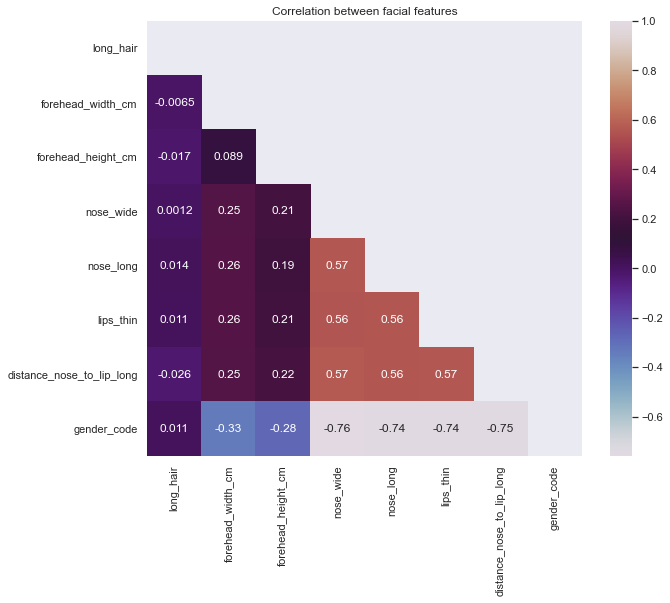

In [256]:
mask = np.zeros_like(person.corr())
mask[np.tril_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 8))
corr = person.corr()
sns.heatmap(corr, vmax=1,annot=True,cmap='twilight', mask=mask.T,square=True)

plt.title('Correlation between facial features')

* We can see that there is a negative correlation between gender and nose width, nose length, lips width and  distance  from nose to lips.
* There is a low positive correlation between the parameters of the nose and lips. 

## Train Test Split

In [257]:
from sklearn.model_selection import train_test_split

y = person["gender_code"]
x = person.drop(["gender_code"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

print("x_train : ",x_train)
print ('x train size is:' ,x_train.shape)
print ()

print("x_test : ",x_test)
print ('x test size is:' ,x_test.shape)
print ()

print("y_train : ",y_train)
print ('y train size is:' ,y_train.shape)
print ()

print("y_test : ",y_test)
print ('y test size is:' ,y_test.shape)
print ()

print(f'Size of Training set: {len(x_train), len(y_train)}')
print(f'Size of Test set {len(x_test), len(y_test)}')

x_train :        long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
1088          1               14.0                 6.0          0          0   
479           1               12.6                 6.4          1          1   
727           1               13.1                 6.5          1          1   
3783          0               12.6                 6.8          1          1   
976           1               11.9                 5.7          0          0   
...         ...                ...                 ...        ...        ...   
4426          1               13.0                 6.5          0          0   
466           1               13.1                 5.5          0          0   
3092          1               12.0                 5.9          0          0   
3772          1               12.8                 5.4          0          0   
860           1               11.4                 5.5          0          0   

      lips_thin  distance_no

## Modeling
### KNN:

<B> We will check in range of 100  which accuracy we get with specific k, and get just the accuracy above 0.97

In [258]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = list(range(1, 100))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    # calculate accuracy
    mas=metrics.accuracy_score(y_test, y_pred)
    if mas>=0.97:
        print('for k=',k,'the accuracy is:', mas)

for k= 15 the accuracy is: 0.9705147426286856
for k= 17 the accuracy is: 0.9705147426286856
for k= 22 the accuracy is: 0.9700149925037481
for k= 23 the accuracy is: 0.9705147426286856
for k= 24 the accuracy is: 0.9710144927536232
for k= 25 the accuracy is: 0.9700149925037481
for k= 27 the accuracy is: 0.9705147426286856
for k= 28 the accuracy is: 0.9700149925037481
for k= 29 the accuracy is: 0.9710144927536232
for k= 31 the accuracy is: 0.9705147426286856
for k= 32 the accuracy is: 0.9710144927536232
for k= 33 the accuracy is: 0.9715142428785607
for k= 34 the accuracy is: 0.9715142428785607
for k= 35 the accuracy is: 0.9705147426286856
for k= 36 the accuracy is: 0.9705147426286856
for k= 37 the accuracy is: 0.9710144927536232
for k= 38 the accuracy is: 0.9715142428785607
for k= 39 the accuracy is: 0.9715142428785607
for k= 40 the accuracy is: 0.9705147426286856
for k= 41 the accuracy is: 0.9710144927536232
for k= 42 the accuracy is: 0.9710144927536232
for k= 43 the accuracy is: 0.97201

* <B> It can be seen that the maximum accuracy is about 0.97 so I checked wich k gives that:


In [259]:
k_range = list(range(1, 100))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_knn = knn.predict(x_test)
    mas=metrics.accuracy_score(y_test, y_pred_knn)
    if mas>=0.972:
        print('for k=',k,'the accuracy is:', mas)

for k= 43 the accuracy is: 0.9720139930034982
for k= 49 the accuracy is: 0.9720139930034982
for k= 95 the accuracy is: 0.9720139930034982
for k= 97 the accuracy is: 0.9720139930034982


* <B>We can see that all this k gives the same accuracy, **so the final accuraccy is 0.9720139930034982, for k=43/49/95/97**

### Confution Metrics

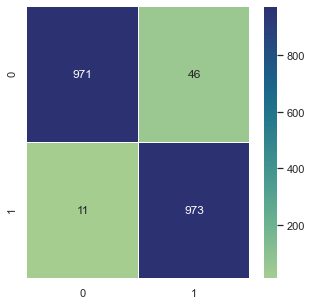

In [260]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(confusion,annot = True, linewidth = 0.5, fmt = ".0f", ax = ax,cmap="crest")
plt.show()

In [261]:
print('Out of 2001 samples the model was right in',TP+TN,'of the samples and wrong in', FP+FN, 'sampels')
# how often is the classifier correct?
print('Classification Accuracy:',(TP + TN) / float(TP + TN + FP + FN))
#how often is the classifier incorrect?
print('Classification Error:',(FP + FN) / float(TP + TN + FP + FN))

Out of 2001 samples the model was right in 1944 of the samples and wrong in 57 sampels
Classification Accuracy: 0.9715142428785607
Classification Error: 0.02848575712143928


* <B> we can see that the model 95% accurate. 

### Roc Curve

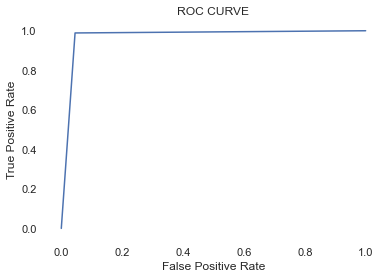

The score ROC Curve is: 97.2%


In [262]:
from sklearn.metrics import  roc_curve
from sklearn.metrics import roc_auc_score
false_positive_rate, true_positiv_rate, _= roc_curve(y_test, y_pred)
auc= roc_auc_score(y_test, y_pred)
plt.plot(false_positive_rate, true_positiv_rate, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()
 
print(f"The score ROC Curve is: {round(auc,3)*100}%")



## Cross Validation

In [264]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation
knn = KNeighborsClassifier(n_neighbors=43)
print(cross_val_score(knn, x, y, cv=10, scoring='accuracy'))
print(cross_val_score(knn, x, y, cv=10, scoring='accuracy').mean())

[0.95808383 0.97       0.972      0.968      0.982      0.986
 0.974      0.966      0.98       0.976     ]
0.9732083832335331


* <B> we can see that the final accuracy is 97%


## Logistic Regassion, Random Forest and Decision Tree

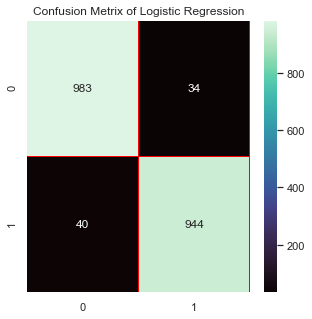

Out of 2001  samples the model was right in 1927 of the samples and wrong in 74 sampels
Classification Accuracy: 0.9630184907546226
Classification Error: 0.03698150924537731


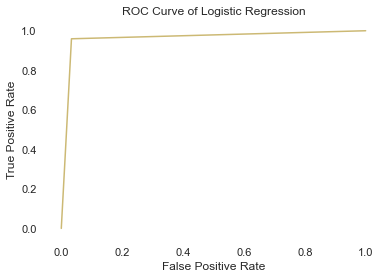

The score ROC Curve is: 96.3%


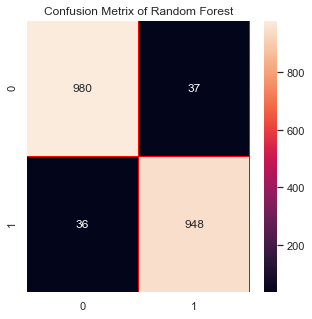

Out of 2001  samples the model was right in 1928 of the samples and wrong in 73 sampels
Classification Accuracy: 0.9635182408795602
Classification Error: 0.03648175912043978


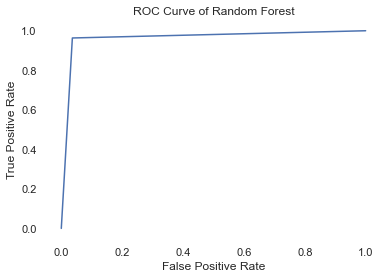

The score ROC Curve is: 96.39999999999999%


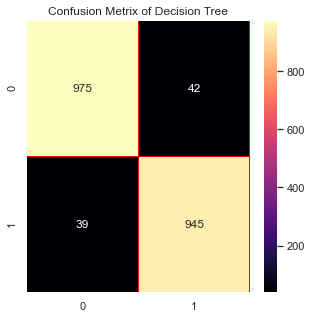

Out of 2001  samples the model was right in 1920 of the samples and wrong in 81 sampels
Classification Accuracy: 0.95952023988006
Classification Error: 0.04047976011994003


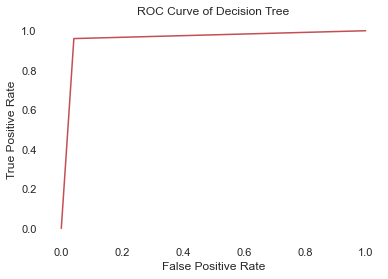

The score ROC Curve is: 96.0%


In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

models = [LogisticRegression(),RandomForestClassifier(), DecisionTreeClassifier()]
model_names=['LogisticRegression','RandomForestClassifier','DecisionTree']
acc=[]
colors1=["mako","rocket","magma"]
colors2=["y","b","r"]

for model in range(3):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    
    #accuracy of each model
    acc.append(accuracy_score(pred,y_test))
    
    # confusion matrix
    cm = confusion_matrix(y_test, pred)
    f ,ax = plt.subplots(figsize = (5,5))
    sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax = ax, cmap=colors1[model])
    titels=['Logistic Regression','Random Forest','Decision Tree']
    plt.title("Confusion Metrix of "+titels[model])
    plt.show()
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    print('Out of',TP + TN + FP + FN,'samples the model was right in',TP+TN,'of the samples and wrong in', FP+FN, 'sampels')
    print('Classification Accuracy:',(TP + TN) / float(TP + TN + FP + FN))
    print('Classification Error:',(FP + FN) / float(TP + TN + FP + FN))
   
    #ROC
    false_positive_rate, true_positiv_rate, _= roc_curve(y_test, pred)
    auc= roc_auc_score(y_test, pred)
    plt.plot(false_positive_rate, true_positiv_rate, label="auc="+str(auc), color=colors2[model])
    plt.box(False)
    plt.title('ROC Curve of '+titels[model])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.show()
    print(f"The score ROC Curve is: {round(auc,3)*100}%")



### Accuracy:



In [29]:
d={'Modelling':model_names,'Accuracy':acc}    
acc_frame=pd.DataFrame(d)
acc_frame



,Modelling,Accuracy
0,LogisticRegression,0.963018
1,RandomForestClassifier,0.965017
2,DecisionTree,0.958021


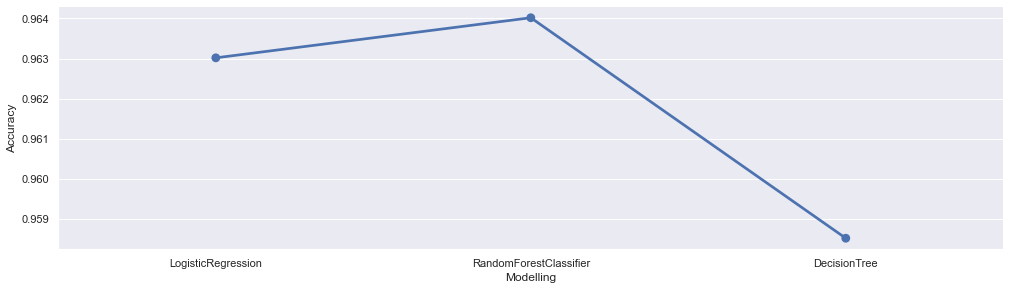

In [101]:
sns.catplot(x='Modelling',y='Accuracy',data=acc_frame,kind='point',height=4,aspect=3.5)

* We can see that the heigest accuracy is in the model  Random Forest Classifier with 96%.

## Dummy Model:

In [26]:
from sklearn.dummy import DummyClassifier
  
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(x_train, y_train)

y_pred_dummy=dummy_clf.predict(x_test)
dummy_clf.score(y_test, y_pred_dummy)


0.5027486256871564

### Confution Metrics

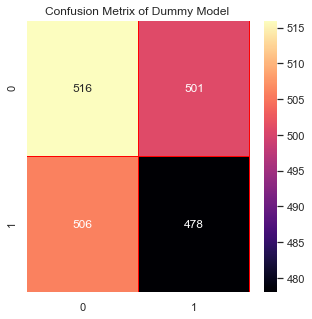

Out of 2001 samples the model was right in 994 of the samples and wrong in 1007 sampels
Classification Accuracy: 0.496751624187906
Classification Error: 0.5032483758120939


In [268]:
cm = confusion_matrix(y_test, y_pred_dummy)
f ,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax = ax, cmap=colors1[model])
plt.title("Confusion Metrix of Dummy Model ")
plt.show()
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
print('Out of',TP + TN + FP + FN,'samples the model was right in',TP+TN,'of the samples and wrong in', FP+FN, 'sampels')
print('Classification Accuracy:',(TP + TN) / float(TP + TN + FP + FN))
print('Classification Error:',(FP + FN) / float(TP + TN + FP + FN))

 ### Roc Curve

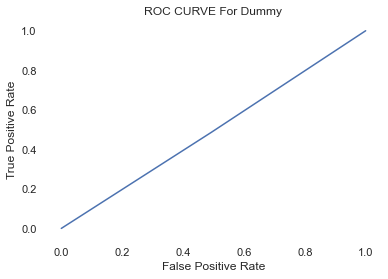

The score ROC Curve is: 95.8%


In [207]:
false_positive_rate, true_positiv_rate, _= roc_curve(y_test, y_pred_dummy)
auc_dum= roc_auc_score(y_test, y_pred_dummy)
plt.plot(false_positive_rate, true_positiv_rate, label="auc="+str(auc_dum))
plt.box(False)
plt.title('ROC CURVE For Dummy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()
 
print(f"The score ROC Curve is: {round(auc,3)*100}%")

* <B> We can see that the best model is KNN  of all the modeles that I checked, with 97%

## Conclusion:
In this project I worked on a dataset of facial features and tried to predict gender according to those characteristics.
During the presentation of the data it could be seen that there is a correlation between the forehead and nose fillers and the gender type. No correlation was found between hair length and gender.
In the model training it can be seen that the percentage of accuracy in all of them is relatively high - over 95% for all models, and out of them the model KNN showed the highest percentage of accuracy-97%.


# Thank you for watching! 🙃